# Data augmentation

The idea is simple: we don't have that many images, so let's make the most of the few we have. We'll generate new images by applying a number of transformations to the ones we have: we will zoom in, out, distort them a bit, translate them, rotate them... 

Luckily, we basically don't have to code any of this: it's already provided by the ImageDataGenerator class in Keras!

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras.optimizers import Adam
import os

base_dir = 'databackup/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

Using TensorFlow backend.


In [2]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')

validation_generator_noshuffle = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        shuffle=False,                                                            
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [3]:
my_2nd_cnn = keras.Sequential()
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Flatten())
my_2nd_cnn.add(Dense(64, activation='relu'))
my_2nd_cnn.add(Dense(1, activation='sigmoid'))

my_2nd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [4]:
my_2nd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_2nd_cnn.fit_generator(train_generator,
                                   class_weight = {0: 7, 1: 1},
                                   steps_per_epoch=30,
                                   epochs=25,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/25
30/30 [==============================] - 103s 3s/step - loss: 1.0620 - acc: 0.5750 - val_loss: 0.3981 - val_acc: 0.8016
Epoch 2/25
30/30 [==============================] - 19s 631ms/step - loss: 0.9368 - acc: 0.7156 - val_loss: 0.4725 - val_acc: 0.7702
Epoch 3/25
30/30 [==============================] - 19s 631ms/step - loss: 0.8348 - acc: 0.7485 - val_loss: 0.3540 - val_acc: 0.8229
Epoch 4/25
30/30 [==============================] - 19s 633ms/step - loss: 0.7824 - acc: 0.7757 - val_loss: 0.4506 - val_acc: 0.7571
Epoch 5/25
30/30 [==============================] - 19s 636ms/step - loss: 0.6799 - acc: 0.7935 - val_loss: 0.4001 - val_acc: 0.8036
Epoch 6/25
30/30 [==============================] - 19s 628ms/step - loss: 0.7236 - acc: 0.7684 - val_loss: 0.4802 - val_acc: 0.7389
Epoch 7/25
30/30 [==============================] - 19s 638ms/step - loss: 0.6994 - acc: 0.7970 - val_loss: 0.2637 - val_acc: 0.8907
Epoch 8/25
30/30 [==============================] - 19s 634ms/step - lo

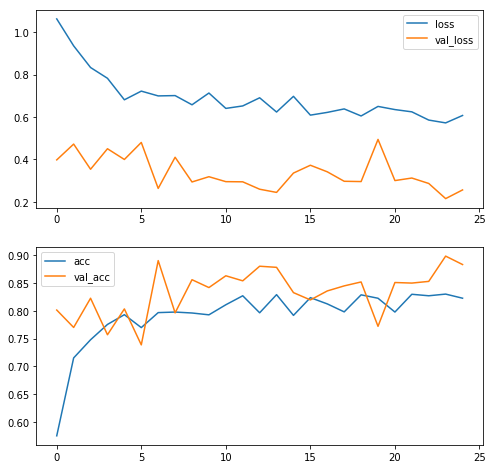

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

0.527173913043 0.850877192982


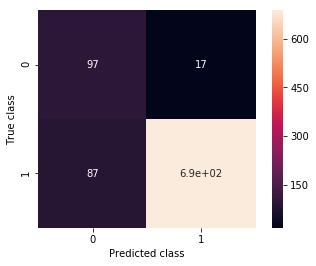

In [6]:
from mateosio import plot_confusion_matrix

ax, precision, recall = plot_confusion_matrix(my_2nd_cnn, validation_generator_noshuffle)
print(precision, recall)

Wow, now I am underfitting! I guess that means I can make my model even a bit more complex, let's see

### One more layer

In [7]:
my_3rd_cnn = keras.Sequential()
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Flatten())
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(64, activation='relu'))
my_3rd_cnn.add(Dense(1, activation='sigmoid'))

my_3rd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
__________

In [8]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_3rd_cnn.fit_generator(train_generator,
                                   class_weight = {0: 7, 1: 1},
                                   steps_per_epoch=30,
                                   epochs=20,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/20
30/30 [==============================] - 22s 738ms/step - loss: 1.1218 - acc: 0.6287 - val_loss: 0.5003 - val_acc: 0.7743
Epoch 2/20
30/30 [==============================] - 19s 641ms/step - loss: 0.8456 - acc: 0.7547 - val_loss: 0.2762 - val_acc: 0.8937
Epoch 3/20
30/30 [==============================] - 19s 647ms/step - loss: 0.7652 - acc: 0.7980 - val_loss: 0.2955 - val_acc: 0.8704
Epoch 4/20
30/30 [==============================] - 19s 640ms/step - loss: 0.7404 - acc: 0.7955 - val_loss: 0.3059 - val_acc: 0.8623
Epoch 5/20
30/30 [==============================] - 19s 632ms/step - loss: 0.7190 - acc: 0.7973 - val_loss: 0.7267 - val_acc: 0.6427
Epoch 6/20
30/30 [==============================] - 19s 627ms/step - loss: 0.7748 - acc: 0.7844 - val_loss: 0.3601 - val_acc: 0.8411
Epoch 7/20
30/30 [==============================] - 19s 641ms/step - loss: 0.7158 - acc: 0.7819 - val_loss: 0.3201 - val_acc: 0.8563
Epoch 8/20
30/30 [==============================] - 19s 641ms/step - 

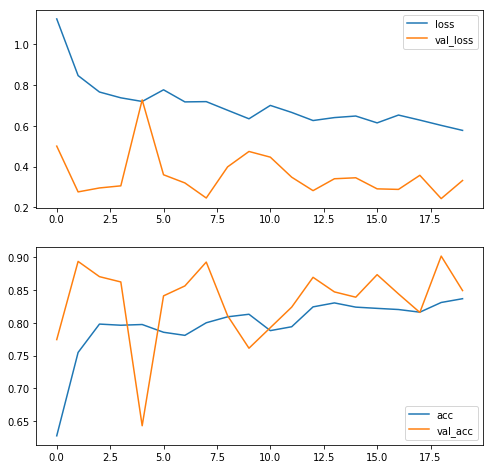

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

0.128318584071 0.254385964912


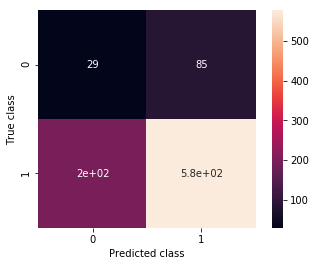

In [10]:
ax, precision, recall = plot_confusion_matrix(my_3rd_cnn, validation_generator)
print(precision, recall)

One of the best pieces of advice I got from Jeremy Howard's Deep Learning for Coders is that you should first attempt to overfit, then deal with that through regularization. It makes a lot of sense: once you have overfitting, you know you've juiced your model to the max. If you don't, you don't know whether there is still a lot of life left on it or it's at the maximum performance it's going to get. Let's go for that overfitting. 

Once a model stops improving with a particular learning rate, it's often useful to reduce the learning rate and keep training.

In [11]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-4),
                   metrics=['acc'])

history_pt2 = my_3rd_cnn.fit_generator(train_generator,
                                       class_weight = {0: 7, 1: 1},
                                       steps_per_epoch=30,
                                       epochs=30,
                                       validation_data=validation_generator,
                                       validation_steps=10,
                                       verbose=1)

Epoch 1/30
30/30 [==============================] - 22s 744ms/step - loss: 0.5691 - acc: 0.8459 - val_loss: 0.3118 - val_acc: 0.8563
Epoch 2/30
30/30 [==============================] - 19s 647ms/step - loss: 0.5616 - acc: 0.8357 - val_loss: 0.2671 - val_acc: 0.8816
Epoch 3/30
30/30 [==============================] - 19s 627ms/step - loss: 0.5210 - acc: 0.8518 - val_loss: 0.2749 - val_acc: 0.8765
Epoch 4/30
30/30 [==============================] - 20s 652ms/step - loss: 0.5090 - acc: 0.8510 - val_loss: 0.2648 - val_acc: 0.8785
Epoch 5/30
30/30 [==============================] - 19s 646ms/step - loss: 0.5674 - acc: 0.8387 - val_loss: 0.2791 - val_acc: 0.8755
Epoch 6/30
30/30 [==============================] - 19s 646ms/step - loss: 0.5109 - acc: 0.8577 - val_loss: 0.2602 - val_acc: 0.8897
Epoch 7/30
30/30 [==============================] - 19s 649ms/step - loss: 0.5544 - acc: 0.8417 - val_loss: 0.2583 - val_acc: 0.8877
Epoch 8/30
30/30 [==============================] - 20s 670ms/step - 

0.581395348837 0.877192982456


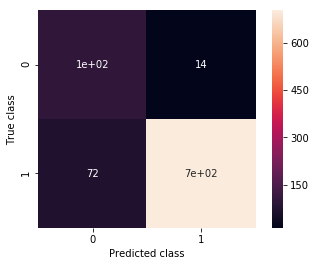

In [12]:
ax, precision, recall = plot_confusion_matrix(my_3rd_cnn, validation_generator_noshuffle)
print(precision, recall)